In [1]:
from networkx.algorithms.bipartite.basic import color
!pip install torch torchvision torchaudio matplotlib numpy tqdm

In [2]:
# base
import os
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm

# helpers
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from torchvision.transforms import v2

In [3]:
class MyModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
        )
    
    def forward(self, x):
        return self.model(x)

In [4]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

### LambdaLR scheduler

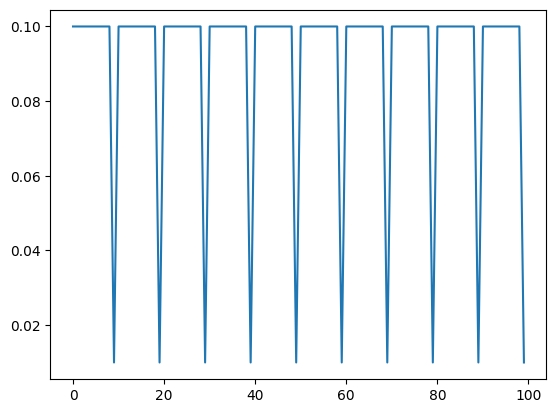

In [5]:
lr_lambda = lambda step: 0.1 if step % 10 == 0 else 1
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

list_ = []

for epoch in range(100):
    
    # INFO Train
    for _ in range(1):
        optimizer.step()
    
    # INFO Validation
        
    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)
    
plt.plot(list_)
plt.show()

## MultiStep LR

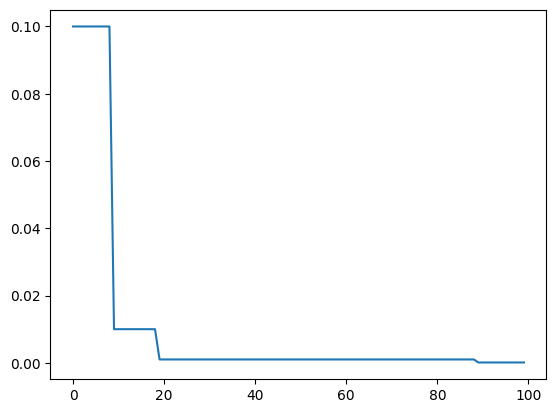

In [6]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20, 90], gamma=0.1)

list_ = []

for epoch in range(100):
    
    # INFO Train
    for _ in range(1):
        optimizer.step()
    
    # INFO Validation
        
    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)
    
plt.plot(list_)
plt.show()


## Step LR scheduler 

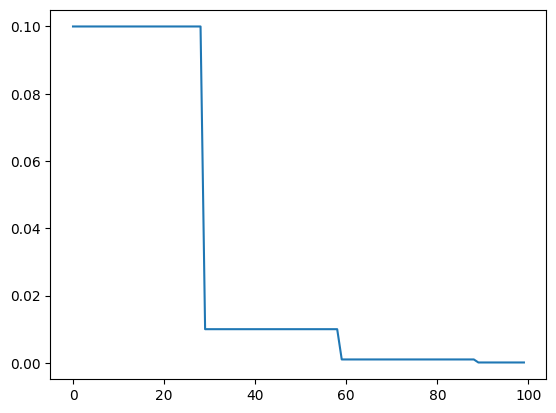

In [7]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

list_ = []

for epoch in range(100):
    
    # INFO Train
    for _ in range(1):
        optimizer.step()
    
    # INFO Validation
        
    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)
    
plt.plot(list_)
plt.show()


## Exponential LR

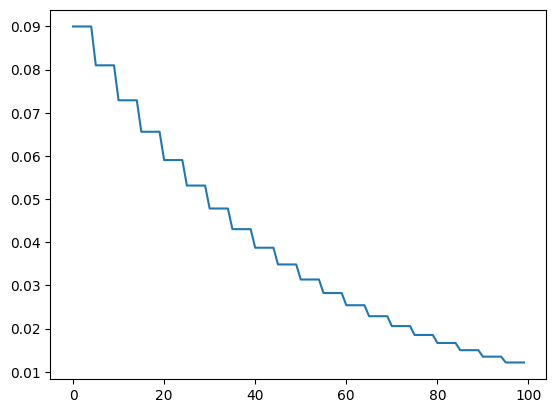

In [8]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

list_ = []

for epoch in range(100):
    
    # INFO Train
    for _ in range(1):
        optimizer.step()
    
    # INFO Validation
        
    if epoch % 5 == 0:
        lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)
    
plt.plot(list_)
plt.show()


# ReduceLDOnPlateau

In [71]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                                          mode='min',
                                                          factor=0.1,
                                                          patience=5,
                                                          threshold=0.0001,
                                                          threshold_mode='rel',
                                                          cooldown=0,
                                                          min_lr=0,
                                                          eps=1e-8)

In [72]:
loss = torch.full([5,10], 0.1)
loss = loss * torch.tensor([1/i for i in range(1, 6)]).reshape([5,1])
loss = loss.reshape([50])

loss

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
        0.0500, 0.0500, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
        0.0333, 0.0333, 0.0333, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
        0.0250, 0.0250, 0.0250, 0.0250, 0.0200, 0.0200, 0.0200, 0.0200, 0.0200,
        0.0200, 0.0200, 0.0200, 0.0200, 0.0200])

In [73]:
list_ = []

for epoch in range(50):
    
    # INFO Train
    for _ in range(1):
        optimizer.step()
    
    # INFO Validation
        
    idx = epoch
    lr_scheduler.step(loss[idx])
    lr = lr_scheduler._last_lr[0]
    # lr = lr_scheduler.get_last_lr()
    list_.append(lr)

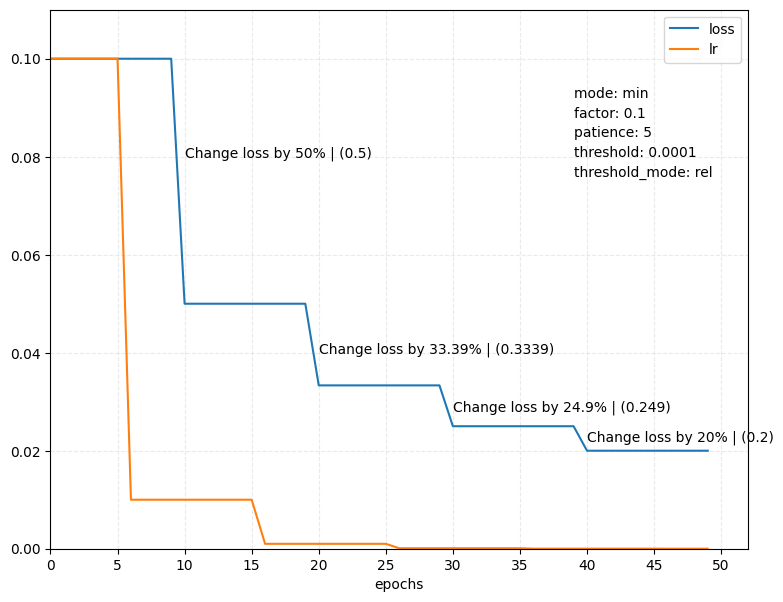

In [74]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(loss)
ax.plot(list_)

ax.set_xlim(0, 52)
ax.set_ylim(0, 0.11)

ax.xaxis.set_major_locator(MultipleLocator(5))

ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))

ax.grid(which='major', color='#CCCCCC', linestyle='--', alpha=0.4)
ax.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.3)

ax.legend(['loss', 'lr'])
ax.set_xlabel('epochs')

if lr_scheduler.threshold_mode == 'abs':
    ax.text(10, 0.08, 'Change loss by 0.05')
    ax.text(20, 0.04, 'Change loss by 0.0167')
    ax.text(30, 0.028, 'Change loss by 0.008')
    ax.text(40, 0.022, 'Change loss by 0.005')
else:
    ax.text(10, 0.08, 'Change loss by 50% | (0.5)')
    ax.text(20, 0.04, 'Change loss by 33.39% | (0.3339)')
    ax.text(30, 0.028, 'Change loss by 24.9% | (0.249)')
    ax.text(40, 0.022, 'Change loss by 20% | (0.2)')

ax.text(39, 0.092, f'mode: {lr_scheduler.mode}')
ax.text(39, 0.088, f'factor: {lr_scheduler.factor}')
ax.text(39, 0.084, f'patience: {lr_scheduler.patience}')
ax.text(39, 0.080, f'threshold: {lr_scheduler.threshold}')
ax.text(39, 0.076, f'threshold_mode: {lr_scheduler.threshold_mode}')

plt.show()